In [37]:
import os
import glob
import shutil

types = ['generated_monet','generated_photo','original_monet','original_picture','reconstructed_monet','reconstructed_picture']

source = 'temp1/param_1/saved_images/'
destination = 'temp1/param_1/saved_images/'
#

for type in types:
    # gather all files
    allfiles = glob.glob(os.path.join(source, f'*{type}*'), recursive=True)
    print("Files to move", allfiles)
    #iterate on all files to move them to destination folder
    for file_path in allfiles:
        print("FILE_PATHH",file_path)
        path =  os.path.join(os.getcwd(),'temp1/param_1/',type)
        print("path:",path)
        if not os.path.exists(path):
            os.makedirs(path)
            print("The new directory is created!")

        destination = os.path.join('temp1/param_1/',type)
        dst_path = os.path.join(destination, os.path.basename(file_path))
        shutil.move(file_path, dst_path)
        print(f"Moved {file_path} -> {dst_path}")

Files to move []
Files to move []
Files to move []
Files to move ['temp1/param_1/saved_images/6_original_picture6000.png', 'temp1/param_1/saved_images/28_original_picture1000.png', 'temp1/param_1/saved_images/32_original_picture3000.png', 'temp1/param_1/saved_images/46_original_picture1000.png', 'temp1/param_1/saved_images/71_original_picture1000.png', 'temp1/param_1/saved_images/47_original_picture5000.png', 'temp1/param_1/saved_images/70_original_picture5000.png', 'temp1/param_1/saved_images/81_original_picture3000.png', 'temp1/param_1/saved_images/29_original_picture0.png', 'temp1/param_1/saved_images/7_original_picture2000.png', 'temp1/param_1/saved_images/29_original_picture5000.png', 'temp1/param_1/saved_images/47_original_picture0.png', 'temp1/param_1/saved_images/51_original_picture0.png', 'temp1/param_1/saved_images/8_original_picture0.png', 'temp1/param_1/saved_images/95_original_picture6000.png', 'temp1/param_1/saved_images/49_original_picture2000.png', 'temp1/param_1/saved_

In [40]:
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [82]:
from skimage import measure
from skimage.metrics import structural_similarity as ssim
#rom skimage.measure import skimage.metrics.structural_similarity as ssim
from matplotlib import pyplot as plt
import cv2
import numpy as np
import math
import os
import glob
%matplotlib inline

def psnr(target, ref):
    # assume RGB image
    target_data = target.astype(float)
    ref_data = ref.astype(float)
    print(target_data.shape)
    print(ref_data.shape)
    diff = ref_data - target_data
    diff = diff.flatten('C')
    rmse = math.sqrt(np.mean(diff ** 2.))
    return 20 * math.log10(255. / rmse)

def mse(target, ref):
    # the MSE between the two images is the sum of the squared difference between the two images
    err = np.sum((target.astype('float') - ref.astype('float')) ** 2)
    err /= float(target.shape[0] * target.shape[1])
    return err
def compare_images_rgb(target, ref):
    scores = []
    scores.append(psnr(target, ref))
    scores.append(mse(target, ref))
    scores.append(ssim(target, ref, multichannel =True))
    return scores

def compare_images_grayscale(imageA, imageB, title):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    s = ssim(imageA, imageB)
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    plt.savefig("test.png")
    # show the images
    plt.show()

In [296]:
def pre_processing(param:str="param_1"):
    import os
    import glob
    import shutil

    types = ['generated_monet','generated_photo','original_monet','original_picture','reconstructed_monet','reconstructed_picture']

    source = f'{param}/saved_images/'

    for type in types:
        # gather all files
        allfiles = glob.glob(os.path.join(source, f'*{type}*'), recursive=True)
        print("Files to move", allfiles)
        #iterate on all files to move them to destination folder
        for file_path in allfiles:
            print("FILE_PATHH",file_path)
            path =  os.path.join(os.getcwd(),f'{param}/',type)
            print("path:",path)
            if not os.path.exists(path):
                os.makedirs(path)
                print("The new directory is created!")
            destination = path
            dst_path = os.path.join(destination, os.path.basename(file_path))
            shutil.move(file_path, dst_path)
            print(f"Moved {file_path} -> {dst_path}")

def slice_directories(param:str="param_1"):
    original_img = [img for img in glob.glob(f'{param}/original_picture/2_*')]
    reconstructed_img = [img for img in glob.glob(f'{param}/reconstructed_picture/2_*')]
    generated_monet =[img for img in glob.glob(f'{param}/generated_monet/2_*')]
    original_monet = [img for img in glob.glob(f'{param}/original_monet/2_*')]
    reconstructed_monet = [img for img in glob.glob(f'{param}/reconstructed_monet/2_*')]
    generated_picture =[img for img in glob.glob(f'{param}/generated_photo/2_*')]
    return [original_img,reconstructed_img,generated_monet,original_monet,reconstructed_monet,generated_picture]

Files to move []
Files to move []
Files to move []
Files to move []
Files to move []
Files to move []


In [312]:
original_img = [img for img in glob.glob('param_6_newrun/original_picture/2_*')]
reconstructed_img = [img for img in glob.glob('param_6_newrun/reconstructed_picture/2_*')]
original_monet = [img for img in glob.glob('param_6_newrun/original_monet/2_*')]
reconstructed_monet = [img for img in glob.glob('param_6_newrun/reconstructed_monet/2_*')]
def rgb_error(outputname:str = "test.txt", dataset_orignal:list = original_img, dataset_reconstructed:list =reconstructed_img,title="FOR ORIGINAL/RECONSTRUCTED IMAGE"):
    total_PSNR = 0
    total_MSE = 0
    total_SSIM = 0
    with open(outputname, 'w') as f:
        f.write(f"#################{title}#############\n")
        for i in range(len(dataset_orignal)):

            target = cv2.imread(dataset_reconstructed[i])
            ref = cv2.imread(dataset_orignal[i])
            scores = compare_images_rgb(target,ref)
            #print('Epoch: {}\nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[0], scores[1], scores[2],i+1))
            str = 'Epoch:{},PSNR: {},MSE: {},SSIM: {}'.format(i+1,scores[0], scores[1], scores[2])
            total_PSNR+=scores[0]
            total_MSE+=scores[1]
            total_SSIM+=scores[2]
            f.write(str)
            f.write('\n')
    return total_PSNR/100,total_MSE/100,total_SSIM/100

def show_dif_pix(orginal_img:str = "temp1/param_1/original_picture/71_original_picture6000.png" ,reconstructed_img:str = "temp1/param_1/reconstructed_picture/71_reconstructed_picture6000.png",generated_monet:str="temp1/param_1/generated_monet/71_generated_monet_6000.png",orginal_monet:str = "temp1/param_1/original_picture/71_original_picture6000.png",
                 reconstructed_monet:str = "temp1/param_1/reconstructed_picture/71_reconstructed_picture6000.png",
                 generated_img:str = "temp1/param_1/generated_picture/71_generated_photo_6000.png",
                 output:str = "diff.png"):
    from PIL import Image
    from pixelmatch.contrib.PIL import pixelmatch

    save_img_name = os.path.basename(orginal_img)
    split_tup = os.path.splitext(save_img_name)



    original_img = Image.open(orginal_img)
    reconstructed_img = Image.open(reconstructed_img)
    generated_monet = Image.open(generated_monet)
    original_monet= Image.open(orginal_monet)
    generated_img =Image.open(generated_img)
    reconstructed_monet = Image.open(reconstructed_monet)


    img_diff = Image.new("RGBA", original_img.size)
    monet_diff = Image.new("RGBA", original_img.size)

    mismatch_img = pixelmatch(original_img, reconstructed_img, img_diff, includeAA=False)
    mismatch_monet = pixelmatch(original_monet, reconstructed_monet, monet_diff, includeAA=False)
    #diff = Image.open("diff.png")

    #test = [original_img,reconstructed,img_diff,original_monet,reconstructed_monet,monet_diff]

    fig, ax = plt.subplots(2, 4, figsize=(12, 8))
    #fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    #for i, ax in enumerate(axes.flatten()):
    #    ax = ax.imshow(test[i])
     #   ax.axis('off')
    fig.subplots_adjust(hspace=0)
    fig.subplots_adjust(hspace=0, bottom=0, top=1)

    ax[0,0].imshow(original_img)
    ax[0,0].axis('off')
    ax[0,0].set_title("Orignal")
    ax[0,1].imshow(reconstructed_img)
    ax[0,1].axis('off')
    ax[0,1].set_title("Reconstructed")
    ax[0,2].imshow(img_diff)
    ax[0,2].axis('off')
    ax[0,2].set_title("Pixel difference")
    ax[0,3].imshow(generated_monet)
    ax[0,3].axis('off')
    ax[0,3].set_title("Generated")
    ax[1,0].imshow(original_monet)
    ax[1,0].axis('off')
    ax[1,1].imshow(reconstructed_monet)
    ax[1,1].axis('off')
    ax[1,2].imshow(monet_diff)
    ax[1,2].axis('off')
    ax[1,3].imshow(generated_img)
    ax[1,3].axis('off')
    #ax[1,3].set_title("Generated Photo")

    plt.tight_layout()
    plt.savefig(output)
    plt.show()
    # note how there is no need to specify dimensions
    #img_diff.save(output)
    #plt.imshow(diff, cmap = plt.cm.gray)
    #return mismatch




def greyscale_diff(orginal_img:str ="temp1/param_1/original_picture/70_original_picture6000.png" ,reconstructed_img:str =  "temp1/param_1/reconstructed_picture/70_reconstructed_picture6000.png"):

    original = cv2.imread(orginal_img)
    reconstructed = cv2.imread(reconstructed_img)
    original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    reconstructed = cv2.cvtColor(reconstructed, cv2.COLOR_BGR2GRAY)


    # initialize the figure
    fig = plt.figure("Images")
    images = ("Original", original), ("Reconstructed", reconstructed)
    # loop over the images
    for (i, (name, image)) in enumerate(images):
        # show the image
        ax = fig.add_subplot(1, 2, i + 1)
        ax.set_title(name)
        plt.imshow(image, cmap = plt.cm.gray)
        plt.axis("off")
    # show the figure
    plt.show()
    # compare the images
    compare_images_grayscale(original, original, "Original vs. Original")
    compare_images_grayscale(original, reconstructed, "Original vs. reconstructed")


## Example of using utlities

In [ ]:
#pre-process data
#change to folder name
pre_processing("param_6_newrun")
data =  slice_directories("param_6_newrun")
#sort data
data= [sorted(x) for x in data]
original_img = data[0]
reconstructed_img = data[1]

In [ ]:
#output a MSE,PSNR,SSIM to output.txt of the given images
# e.g., original and reconstructed
rgb_error(original_img,reconstructed_img)


In [ ]:
#Inspection of greyscale difference
greyscale_diff(original_img,reconstructed_img)

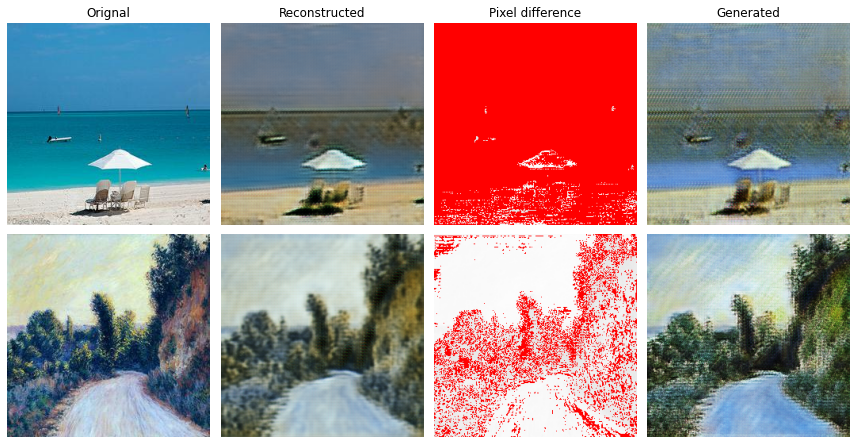

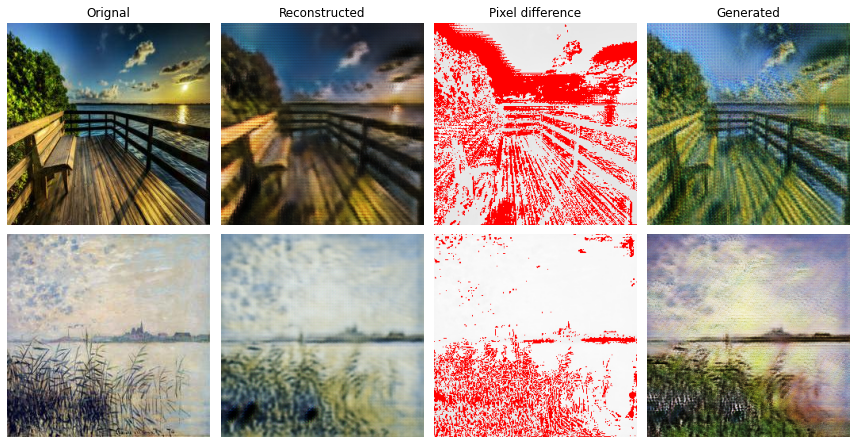

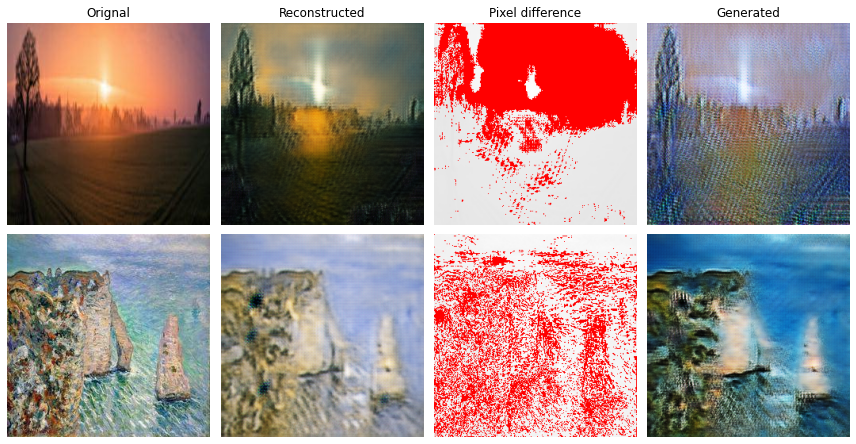

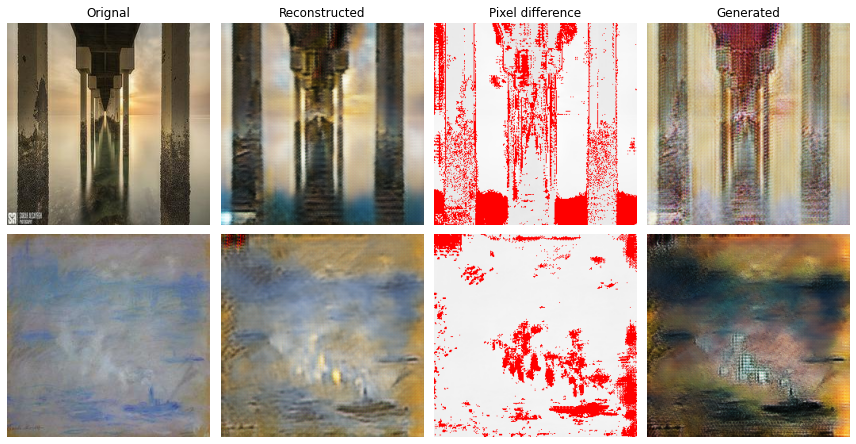

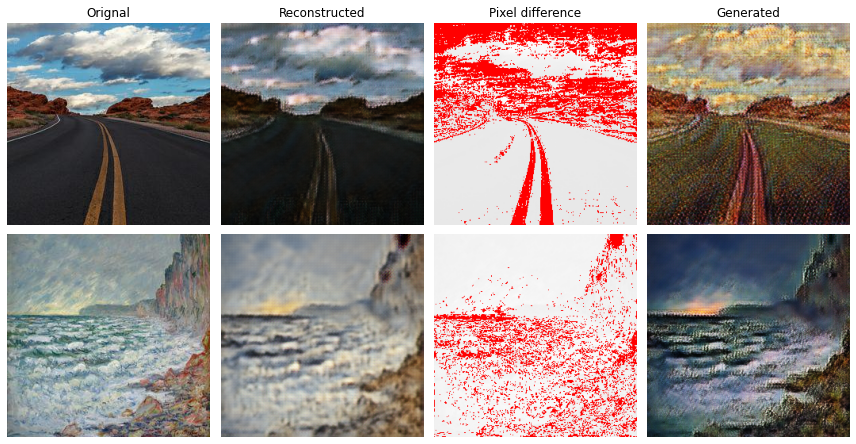

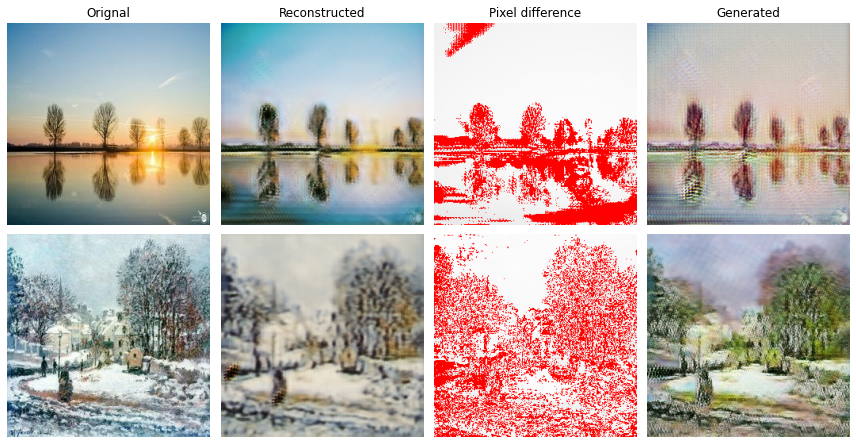

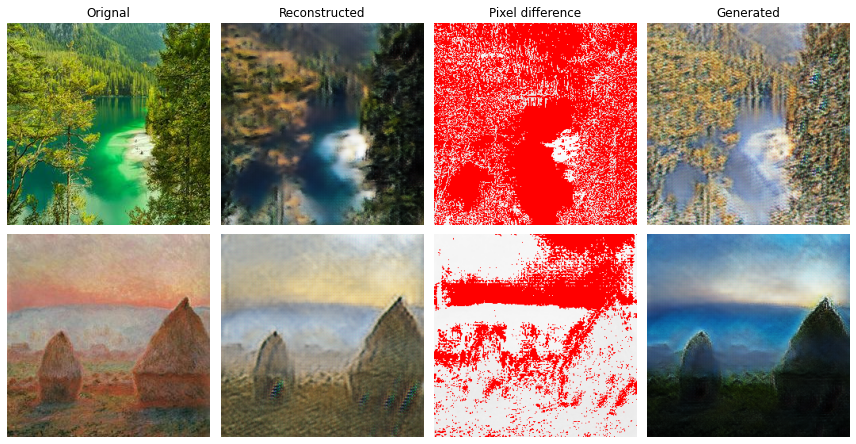

In [301]:
#Generate plots of original image/Monet, reconstructed image/Monet and generated
# image/Monet
for n in range(len(data[0])):
    show_dif_pix(data[0][n],data[1][n],data[2][n],data[3][n],data[4][n],data[5][n],output=f'new_run_e2_param_6_{n}.png')


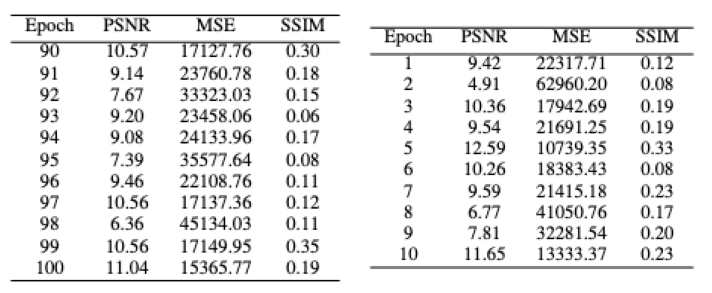

In [324]:
import matplotlib.pyplot as plt





# Load the first image
image1 = plt.imread('test1.png')

# Load the second image
image2 = plt.imread('test2.png')

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Set the aspect ratio of the subplots to be the same
ax1.set_aspect('equal')
ax2.set_aspect('equal')


# Display the first image in the first subplot
ax1.imshow(image1, cmap = plt.cm.gray)
ax1.axis("off")

# Display the second image in the second subplot
ax2.imshow(image2, cmap = plt.cm.gray)
ax2.axis("off")
plt.tight_layout()
# Show the figure
plt.savefig('figure.png')
